In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

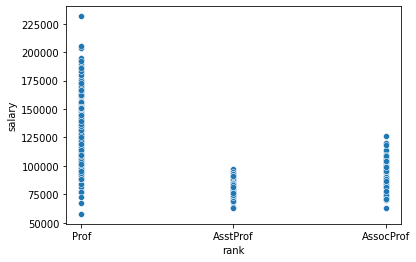

In [6]:
import seaborn as sns
sns.scatterplot(x='rank',y='salary',data=df)

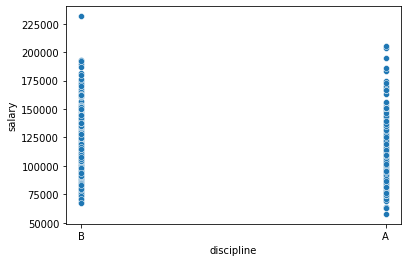

In [7]:
import seaborn as sns
sns.scatterplot(x='discipline',y='salary',data=df)

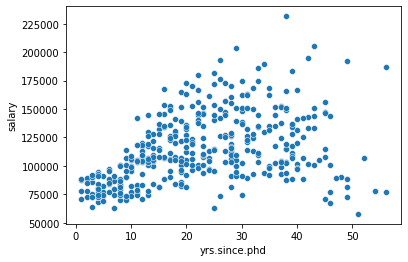

In [8]:
import seaborn as sns
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

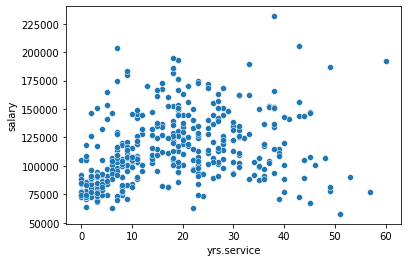

In [9]:
import seaborn as sns
sns.scatterplot(x='yrs.service',y='salary',data=df)

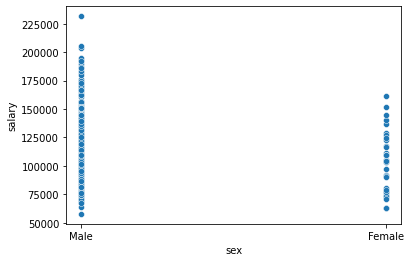

In [10]:
import seaborn as sns
sns.scatterplot(x='sex',y='salary',data=df)

In [11]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [12]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

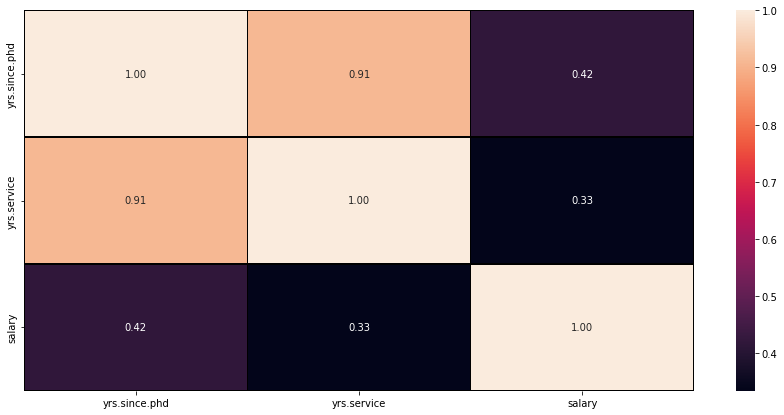

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt='.2f')

In [14]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


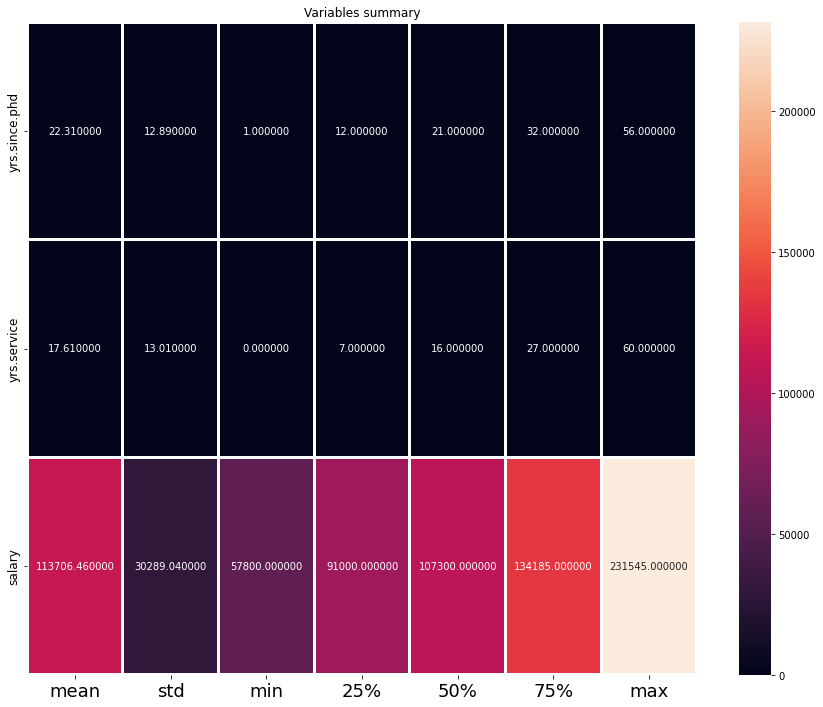

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Outliers checking:

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

In [19]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


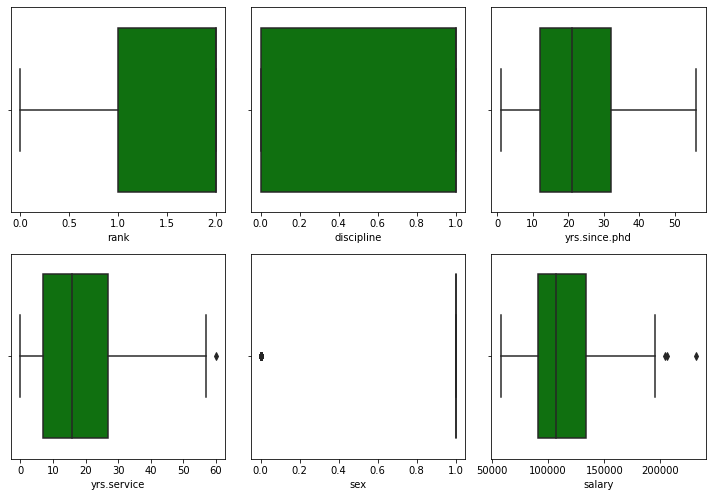

In [20]:


graph=1
plt.figure(figsize=(10,10))
for column in df:
    plt.subplot(3,3,graph)
  
    sns.boxplot(df[column],color='green',orient='h')
    plt.xlabel(column,fontsize=10)
    graph+=1
    plt.tight_layout()


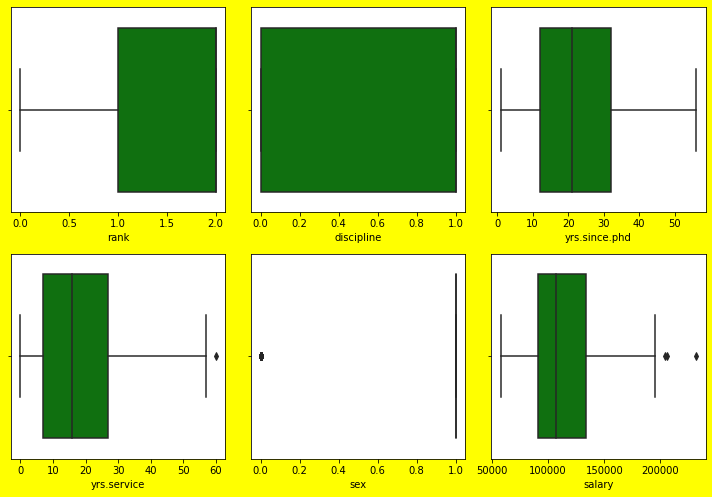

In [21]:
from sklearn.preprocessing import LabelEncoder
graph = 1
plt.figure(figsize=(10,10),facecolor='yellow')
for column in df:

    plt.subplot(3,3,graph)
    sns.boxplot(df[column],color='green',orient='v')
    plt.xlabel(column,fontsize=10)
    graph+=1
    plt.tight_layout()